In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -o housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1390k  100 1390k    0     0  2324k      0 --:--:-- --:--:-- --:--:-- 2320k


In [3]:
# Load the dataset
df = pd.read_csv("housing.csv")
# data = pd.read_csv(PATH, usecols=select_cols)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

KeyError: "['median_house_value'] not in index"

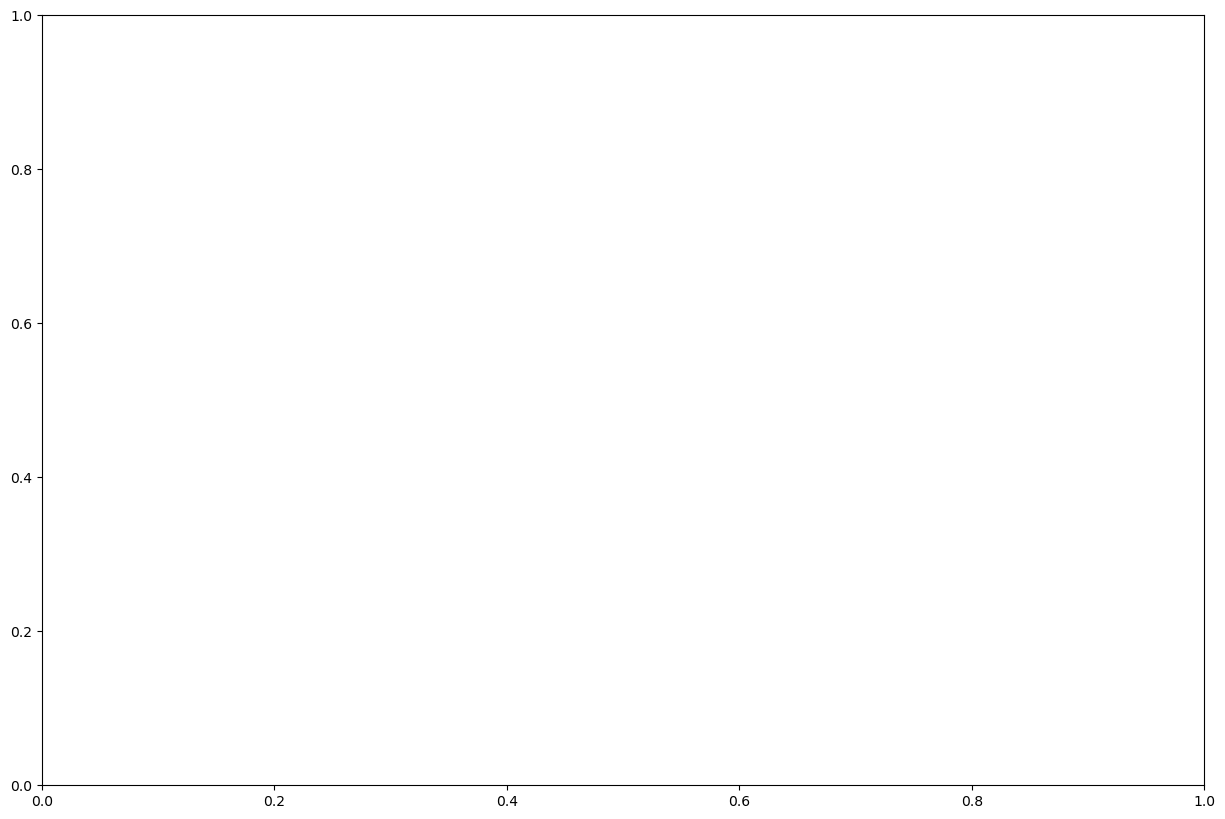

In [49]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

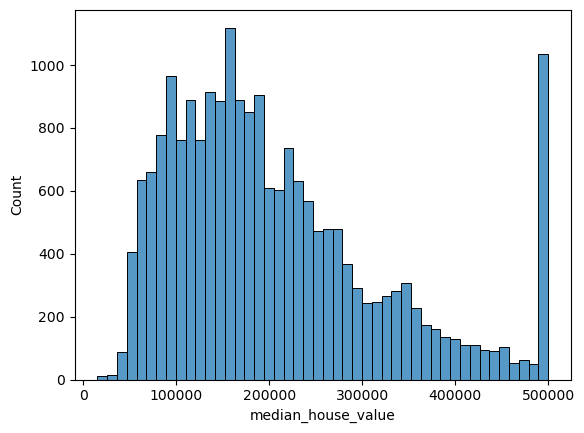

In [7]:
sns.histplot(df['median_house_value'])

In [8]:
hw_cols = [
    'latitude', 
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
df = df[hw_cols]

In [9]:
'''
Question 1

Find a feature with missing values. How many missing values does it have?
'''
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

1166.0

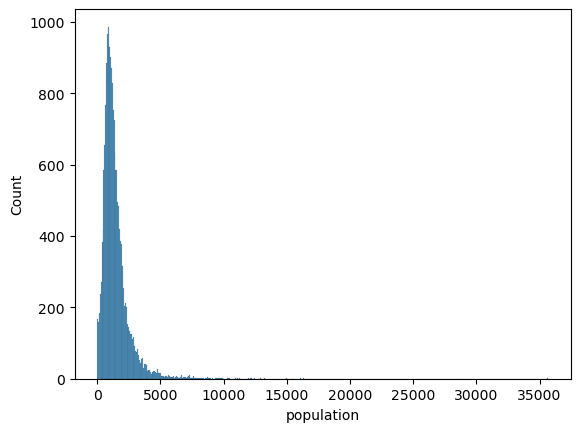

In [10]:
'''
Question 2

What's the median (50% percentile) for variable 'population'?
'''
sns.histplot(df['population'])
df['population'].median()

In [11]:
'''
Split the data

    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Make sure that the target value ('median_house_value') is not in your dataframe.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.

'''
indices = np.arange(0,len(df),1)
np.random.seed(42)
np.random.shuffle(indices)

test_len = int(len(df) * 0.2)
val_len = int(len(df) * 0.2)
train_len = len(df) - test_len - val_len
print(train_len, val_len, test_len)

y = np.log1p(df.pop('median_house_value'))

12384 4128 4128


In [33]:
df_train = df.iloc[indices[:train_len]]
df_val = df.iloc[indices[train_len:train_len+val_len]]
df_test = df.iloc[indices[-test_len:]]
y_train = y.iloc[indices[:train_len]]
y_val = y.iloc[indices[train_len:train_len+val_len]]
y_test = y.iloc[indices[-test_len:]]
print(len(df_train), len(df_val), len(df_test))
print(len(y_train), len(y_val), len(y_test))

12384 4128 4128
12384 4128 4128


In [32]:
'''
Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?
'''
total_bedroom_fillna = df_train['total_bedrooms'].mean()
total_bedroom_fillna = 0

df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(total_bedroom_fillna)

X = df_train.values
X = np.column_stack([np.ones(len(df_train)), X])
XTX_inv_XT = np.linalg.inv(X.T @ X) @ X.T
w = np.dot(XTX_inv_XT, y_train.values)
print(w)

X_val = df_val.values
X_val = np.column_stack([np.ones(len(df_val)), X_val])

rmse = np.sqrt(np.sum((np.dot(X_val, w) - y_val.values) ** 2))
print(round(rmse,2))

[-1.16869752e+01 -2.82087184e-01 -2.76255120e-01  2.91329621e-03
 -8.64531514e-06  1.50811922e-04 -2.08205659e-04  5.69546573e-04
  1.71308139e-01]
21.17


/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3006524318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3006524318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3006524318.py:17: Setti

In [42]:
'''
Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?
'''
total_bedroom_fillna = 0
regularizations = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(total_bedroom_fillna)

for r in regularizations:
    X = df_train.values
    X = np.column_stack([np.ones(len(df_train)), X])
    XTX_inv_XT = np.linalg.inv(X.T @ X + np.eye(np.size(X,1))*r) @ X.T
    w = np.dot(XTX_inv_XT, y_train.values)
    #print(w)

    X_val = df_val.values
    X_val = np.column_stack([np.ones(len(df_val)), X_val])

    rmse = np.sqrt(np.sum((np.dot(X_val, w) - y_val.values) ** 2)/len(y_val))
    print(r, round(rmse,2))

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.34
10 0.35


/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3971067424.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3971067424.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/3971067424.py:15: Setti

In [52]:
'''
Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))
'''

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for s in seeds:
    indices = np.arange(0,len(df),1)
    np.random.seed(s)
    np.random.shuffle(indices)
    test_len = int(len(df) * 0.2)
    val_len = int(len(df) * 0.2)
    train_len = len(df) - test_len - val_len
    
    df_train = df.iloc[indices[:train_len]]
    df_val = df.iloc[indices[train_len:train_len+val_len]]
    df_test = df.iloc[indices[-test_len:]]
    y_train = y.iloc[indices[:train_len]]
    y_val = y.iloc[indices[train_len:train_len+val_len]]
    y_test = y.iloc[indices[-test_len:]]
    
    total_bedroom_fillna = 0
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
    df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
    df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(total_bedroom_fillna)
    
    X = df_train.values
    X = np.column_stack([np.ones(len(df_train)), X])
    XTX_inv_XT = np.linalg.inv(X.T @ X) @ X.T
    w = np.dot(XTX_inv_XT, y_train.values)
    #print(w)

    X_val = df_val.values
    X_val = np.column_stack([np.ones(len(df_val)), X_val])

    rmse = np.sqrt((np.sum((np.dot(X_val, w) - y_val.values) ** 2))/len(y_val))
    
    X_test = df_test.values
    X_test = np.column_stack([np.ones(len(df_test)), X_test])

    rmse_test = np.sqrt((np.sum((np.dot(X_test, w) - y_test.values) ** 2))/len(y_test))
    print(s, round(rmse,2), round(rmse_test,2))
    rmse_scores.append(rmse)
    
print(round(np.std(rmse_scores),3))

0 0.34 0.34
1 0.34 0.34
2 0.33 0.35
3 0.34 0.34
4 0.34 0.34
5 0.34 0.34
6 0.35 0.34
7 0.34 0.35
8 0.35 0.35
9 0.34 0.35
0.004


/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/2740363552.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/2740363552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/2740363552.py:33: Setti

In [45]:
'''
Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?
'''
indices = np.arange(0,len(df),1)
np.random.seed(9)
np.random.shuffle(indices)
test_len = int(len(df) * 0.2)
val_len = int(len(df) * 0.2)
train_len = len(df) - test_len - val_len

df_train = df.iloc[indices[:train_len]]
df_val = df.iloc[indices[train_len:train_len+val_len]]
df_test = df.iloc[indices[-test_len:]]
y_train = y.iloc[indices[:train_len]]
y_val = y.iloc[indices[train_len:train_len+val_len]]
y_test = y.iloc[indices[-test_len:]]

total_bedroom_fillna = 0
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(total_bedroom_fillna)

df_train = pd.concat([df_train, df_val], axis=0)
y_train = pd.concat([y_train, y_val], axis=0)

X = df_train.values
X = np.column_stack([np.ones(len(df_train)), X])
XTX_inv_XT = np.linalg.inv(X.T @ X) @ X.T
w = np.dot(XTX_inv_XT, y_train.values)
#print(w)


X_test = df_test.values
X_test = np.column_stack([np.ones(len(df_test)), X_test])

rmse_test = np.sqrt((np.sum((np.dot(X_test, w) - y_test.values) ** 2))/len(y_test))
print(s, round(rmse_test,2))

9 0.35


/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/1159374748.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/1159374748.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(total_bedroom_fillna)
/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_95336/1159374748.py:26: Setti